<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Первичный-анализ-данных" data-toc-modified-id="Первичный-анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Первичный анализ данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Очистка-данных-от-аномальных-значений" data-toc-modified-id="Очистка-данных-от-аномальных-значений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Очистка данных от аномальных значений</a></span></li><li><span><a href="#Восстановление-пропущенных-значений" data-toc-modified-id="Восстановление-пропущенных-значений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Восстановление пропущенных значений</a></span></li><li><span><a href="#Изменение-типа-данных" data-toc-modified-id="Изменение-типа-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изменение типа данных</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка признаков</a></span><ul class="toc-item"><li><span><a href="#Кодирование-категориальных-признаков" data-toc-modified-id="Кодирование-категориальных-признаков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Кодирование категориальных признаков</a></span></li><li><span><a href="#Подготовка-обучающей-и-тестовой-выборок" data-toc-modified-id="Подготовка-обучающей-и-тестовой-выборок-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Подготовка обучающей и тестовой выборок</a></span></li><li><span><a href="#Масштабирование-числовых-признаков" data-toc-modified-id="Масштабирование-числовых-признаков-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Масштабирование числовых признаков</a></span></li></ul></li><li><span><a href="#Моделирование" data-toc-modified-id="Моделирование-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Моделирование</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Проект: «Определение стоимости автомобилей»

В нашем распоряжении исторические данные cервиса по продаже автомобилей с пробегом: технические характеристики, комплектации и цены автомобилей. 

**Цель:**
- построить модель для определения стоимости автомобиля.

**Заказчику важны:**
- качество предсказания;
- скорость предсказания;
- время обучения.

**Описание данных:**
- Признаки:
    - `DateCrawled` — дата скачивания анкеты из базы
    - `VehicleType` — тип автомобильного кузова
    - `RegistrationYear` — год регистрации автомобиля
    - `Gearbox` — тип коробки передач
    - `Power` — мощность (л. с.)
    - `Model` — модель автомобиля
    - `Kilometer` — пробег (км)
    - `RegistrationMonth` — месяц регистрации автомобиля
    - `FuelType` — тип топлива
    - `Brand` — марка автомобиля
    - `NotRepaired` — была машина в ремонте или нет
    - `DateCreated` — дата создания анкеты
    - `NumberOfPictures` — количество фотографий автомобиля
    - `PostalCode` — почтовый индекс владельца анкеты (пользователя)
    - `LastSeen` — дата последней активности пользователя
- Целевой признак:
    - `Price` — цена (евро)

## Первичный анализ данных

In [33]:
import pandas as pd
import numpy as np
from inflection import underscore

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, BayesianRidge, LassoLars
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

%matplotlib inline
sns.set_style("darkgrid")
random_seed = 17
pd.options.display.float_format = '{:.2f}'.format
pd.options.mode.chained_assignment = None

In [54]:
try:
    df = pd.read_csv('autos.csv')
except FileNotFoundError:
    df = pd.read_csv('/datasets/autos.csv')

Переименуем столбцы исходной таблицы, чтобы они соответствовали стилю *snake_case*.

In [55]:
df.columns = map(underscore, df.columns)

In [56]:
df.head(10)

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


In [57]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        354369 non-null  object
 1   price               354369 non-null  int64 
 2   vehicle_type        316879 non-null  object
 3   registration_year   354369 non-null  int64 
 4   gearbox             334536 non-null  object
 5   power               354369 non-null  int64 
 6   model               334664 non-null  object
 7   kilometer           354369 non-null  int64 
 8   registration_month  354369 non-null  int64 
 9   fuel_type           321474 non-null  object
 10  brand               354369 non-null  object
 11  not_repaired        283215 non-null  object
 12  date_created        354369 non-null  object
 13  number_of_pictures  354369 non-null  int64 
 14  postal_code         354369 non-null  int64 
 15  last_seen           354369 non-null  object
dtypes:

In [58]:
print('Процент пропущенных значений в разрезе каждого признака')
pd.DataFrame(data=df.isna().mean().round(4)*100, columns=['missing_values_rate']).query('missing_values_rate > 0').\
sort_values(by='missing_values_rate')[::-1].\
style.background_gradient('coolwarm')

Процент пропущенных значений в разрезе каждого признака


,missing_values_rate
not_repaired,20.080000
vehicle_type,10.580000
fuel_type,9.280000
gearbox,5.600000
model,5.560000


In [59]:
print(f'Число дубликатов: {df.duplicated().sum()}')

Число дубликатов: 4


In [60]:
df.describe()

,price,registration_year,power,kilometer,registration_month,number_of_pictures,postal_code
count,354369.00,354369.00,354369.00,354369.00,354369.00,354369.00,354369.00
mean,4416.66,2004.23,110.09,128211.17,5.71,0.00,50508.69
std,4514.16,90.23,189.85,37905.34,3.73,0.00,25783.10
min,0.00,1000.00,0.00,5000.00,0.00,0.00,1067.00
25%,1050.00,1999.00,69.00,125000.00,3.00,0.00,30165.00
50%,2700.00,2003.00,105.00,150000.00,6.00,0.00,49413.00
75%,6400.00,2008.00,143.00,150000.00,9.00,0.00,71083.00
max,20000.00,9999.00,20000.00,150000.00,12.00,0.00,99998.00


In [61]:
df.describe(include='object')

,date_crawled,vehicle_type,gearbox,model,fuel_type,brand,not_repaired,date_created,last_seen
count,354369,316879,334536,334664,321474,354369,283215,354369,354369
unique,271174,8,2,250,7,40,2,109,179150
top,2016-03-24 14:49:47,sedan,manual,golf,petrol,volkswagen,no,2016-04-03 00:00:00,2016-04-06 13:45:54
freq,7,91457,268251,29232,216352,77013,247161,13719,17


**Выводы:**
1. Пространство признаков состоит из 9 категориальных и 6 числовых признаков.
2. Стоит оптимизировать типы данных, а именно:
    - оптимизируем хранение числовых признаков;
3. Признаки `not_repaired`, `vehicle_type`, `fuel_type`, `gearbox`, `model` содержат *20.08 %*, *10.58 %*, *9.28 %*, *5.60 %* и *5.56 %* пропущенных значений, соответственно.
4. Исходная таблица содержит *4* дубликата.
5. Обнаружены следующие аномалии:
    - целевой признак `price` содержит нулевые значения;
    - минимальное и максимальное значения, *1000* и *9999*, `registration_year` не могут соответствовать действительности;
    - минимальное и максимальное значения, *0* и *20000*, `power` не могут соответствовать действительности;
    - минимальное значение, *0*, `registration_month` не может соответствовать действительности.
6. Признаки `date_crawled`, `registration_month	`, `date_created`, `number_of_pictures`, `postal_code`, `last_seen` не несут в себе полезной для обучения модели информации.    

## Предобработка данных

### Очистка данных от аномальных значений

Для признака `registration_year` определим выбросы как: все значения, лежащие на 1,5 межквартильных размаха ниже первого квартиля. Максимальным же значением определим дату последней активности пользователя.

In [62]:
minimum = \
df['registration_year'].quantile(0.25) - 1.5 * (df['registration_year'].quantile(0.75) - df['registration_year'].quantile(0.25))

maximum = pd.to_datetime(df['last_seen'], format='%Y-%m-%d %H:%M:%S').max().year
df = df[(df['registration_year'] >= minimum) & (df['registration_year'] <= maximum)]

Для признака `power` с учетом распредления имеющихся значений, а также с учетом полученной информации по исследуемым моделям в сети интернет определим допустимые границы как 60 и 350 л.с.

In [63]:
df.loc[(df['power'] <= 60) | (df['power'] >= 350), 'power'] = None
df['power'] = df['power'].fillna(df.groupby(['model', 'registration_year', 'vehicle_type'])['power'].transform('median'))
df = df.loc[~df['power'].isna()]
df['power'] = df['power'].astype('int64')

In [64]:
df = df.drop_duplicates().reset_index(drop = True)
df = df.drop(['date_crawled', 'registration_month', 'date_created', 'number_of_pictures', 'postal_code', 'last_seen'], axis=1)
df = df.query('price >= 100')

In [65]:
df.describe()

,price,registration_year,power,kilometer
count,305934.00,305934.00,305934.00,305934.00
mean,4759.07,2003.05,122.81,129100.57
std,4557.15,5.61,48.35,36241.44
min,100.00,1986.00,61.00,5000.00
25%,1300.00,1999.00,82.00,125000.00
50%,3000.00,2003.00,114.00,150000.00
75%,6900.00,2007.00,150.00,150000.00
max,20000.00,2016.00,349.00,150000.00


### Восстановление пропущенных значений

Пропущенные значения признака `model` удалим, а остальные заменим на *'unknown'*

In [66]:
df = df.dropna(subset=['model'])

In [67]:
df[['not_repaired', 'fuel_type', 'gearbox', 'vehicle_type']] = \
df[['not_repaired', 'fuel_type', 'gearbox', 'vehicle_type']].fillna('unknown')

### Изменение типа данных

In [68]:
converted_int = df.select_dtypes(include=['int64']).apply(pd.to_numeric, downcast='unsigned')
for column in converted_int.columns:
    df[column] = converted_int[column]

In [69]:
df.head()

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,not_repaired
1,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,unknown
2,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
3,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
4,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
5,2200,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no


In [70]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297281 entries, 1 to 314307
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              297281 non-null  uint16
 1   vehicle_type       297281 non-null  object
 2   registration_year  297281 non-null  uint16
 3   gearbox            297281 non-null  object
 4   power              297281 non-null  uint16
 5   model              297281 non-null  object
 6   kilometer          297281 non-null  uint32
 7   fuel_type          297281 non-null  object
 8   brand              297281 non-null  object
 9   not_repaired       297281 non-null  object
dtypes: object(6), uint16(3), uint32(1)
memory usage: 111.1 MB


## Исследовательский анализ данных

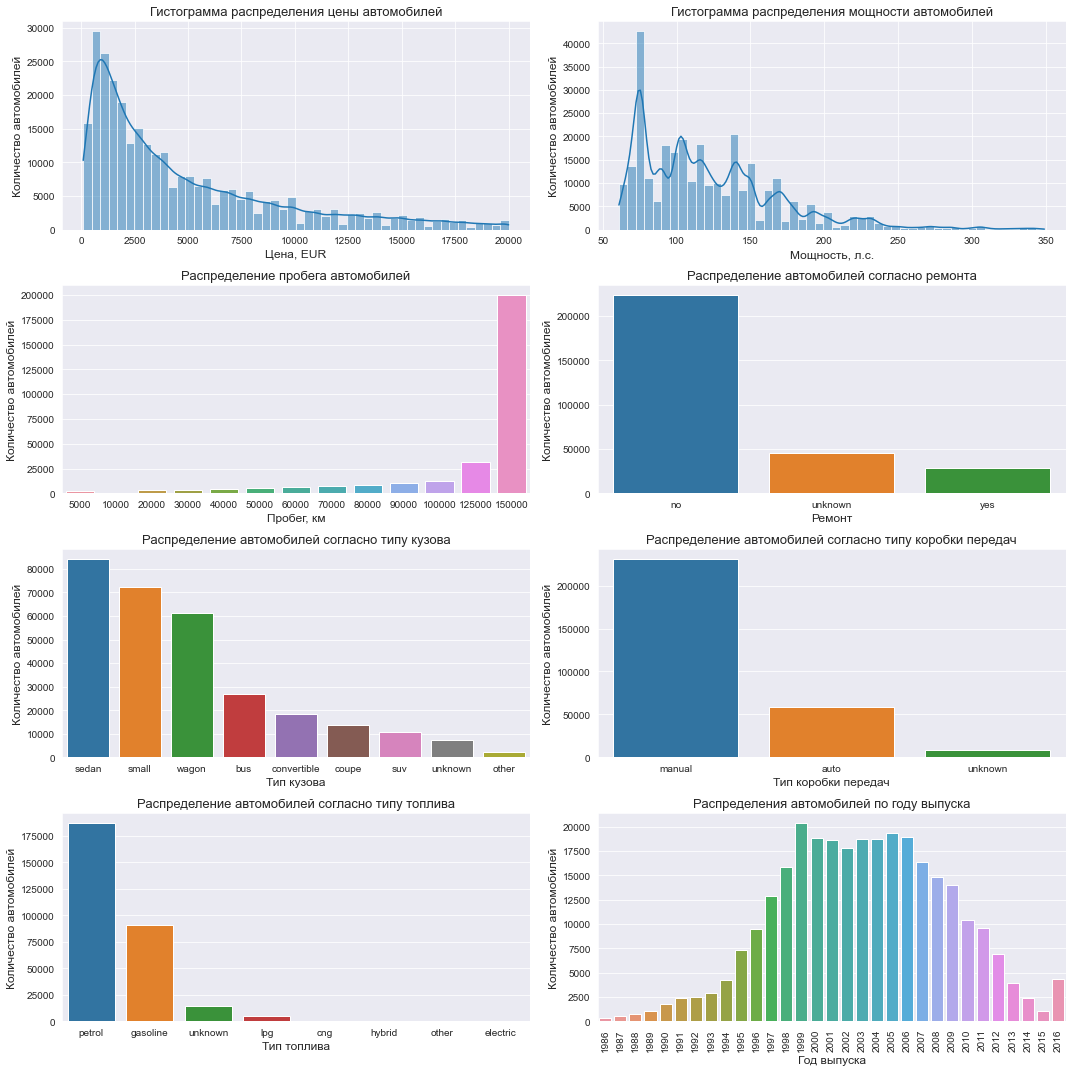

In [71]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))

sns.histplot(df['price'], ax=axs[0, 0], kde=True, bins=50)
sns.histplot(df['power'], ax=axs[0, 1], kde=True, bins=50)
sns.countplot(data = df, x = 'kilometer', ax=axs[1, 0])
sns.countplot(data = df, x = 'not_repaired', order = df['not_repaired'].value_counts().index, ax=axs[1, 1])
sns.countplot(data = df, x = 'vehicle_type', order = df['vehicle_type'].value_counts().index, ax=axs[2, 0])
sns.countplot(data = df, x = 'gearbox', order = df['gearbox'].value_counts().index, ax=axs[2, 1])
sns.countplot(data = df, x = 'fuel_type', order = df['fuel_type'].value_counts().index, ax=axs[3, 0])
sns.countplot(data = df, x = 'registration_year', ax=axs[3, 1])

axs[0, 0].set_title('Гистограмма распределения цены автомобилей', fontsize=13)
axs[0, 0].set_xlabel('Цена, EUR', fontsize=12)
axs[0, 0].set_ylabel('Количество автомобилей', fontsize=12)

axs[0, 1].set_title('Гистограмма распределения мощности автомобилей', fontsize=13)
axs[0, 1].set_xlabel('Мощность, л.с.', fontsize=12)
axs[0, 1].set_ylabel('Количество автомобилей', fontsize=12)

axs[1, 0].set_title('Распределение пробега автомобилей', fontsize=13)
axs[1, 0].set_xlabel('Пробег, км', fontsize=12)
axs[1, 0].set_ylabel('Количество автомобилей', fontsize=12)

axs[1, 1].set_title('Распределение автомобилей согласно ремонта', fontsize=13)
axs[1, 1].set_xlabel('Ремонт', fontsize=12)
axs[1, 1].set_ylabel('Количество автомобилей', fontsize=12)

axs[2, 0].set_title('Распределение автомобилей согласно типу кузова', fontsize=13)
axs[2, 0].set_xlabel('Тип кузова', fontsize=12)
axs[2, 0].set_ylabel('Количество автомобилей', fontsize=12)

axs[2, 1].set_title('Распределение автомобилей согласно типу коробки передач', fontsize=13)
axs[2, 1].set_xlabel('Тип коробки передач', fontsize=12)
axs[2, 1].set_ylabel('Количество автомобилей', fontsize=12)

axs[3, 0].set_title('Распределение автомобилей согласно типу топлива', fontsize=13)
axs[3, 0].set_xlabel('Тип топлива', fontsize=12)
axs[3, 0].set_ylabel('Количество автомобилей', fontsize=12)

axs[3, 1].set_title('Распределения автомобилей по году выпуска', fontsize=13)
axs[3, 1].set_xlabel('Год выпуска', fontsize=12)
axs[3, 1].set_ylabel('Количество автомобилей', fontsize=12)

plt.xticks(rotation=90)
fig.tight_layout();

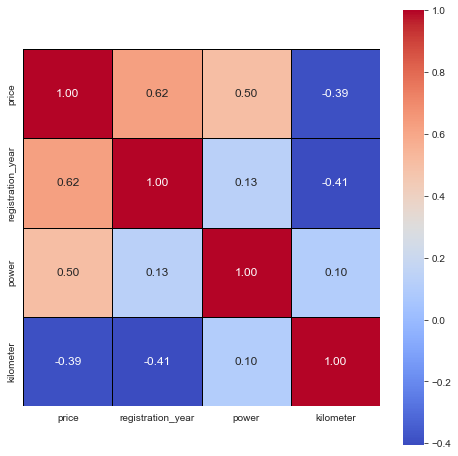

In [72]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), 
            cmap='coolwarm', linewidths=1, linecolor='black', square=True,
            annot=True, fmt='.2f', annot_kws={'size':12});

**Выводы:**
1. Большая часть автомобилей лежит в ценовом диапазоне 100 - 6800 EUR.
2. Большая часть автомобилей имеет мощность 60 - 150 л.с.
3. Больше 50 % продаваемых автомобилей имеют пробег 150000 км и более.
4. Лишь небольшая часть продавцов заявляет о проведение ремонта автомобиля.
5. Основной тип кузова автомобилей присутствующих на сервисе — седан, коробка передач — ручная, топливо — бензин.
6. Цена имеет положительную корреляция с годом выпуска и мощностью автомобиля и отрицательную с пробегом.

## Подготовка признаков

### Кодирование категориальных признаков

In [73]:
df['model'] = df['brand'] + ' ' + df['model']
df = df.drop(['brand'], axis=1)

С учетом того, что категориальные признаки не являются порядковыми и не имеют ранга, то для кодирования данных признаков используем метод *One-Hot Encoding*.

In [74]:
df = pd.get_dummies(df, drop_first=True)

### Подготовка обучающей и тестовой выборок

In [75]:
features = df.drop(['price'], axis=1)
target = df['price']

features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size = 0.25, random_state=random_seed)

print(f'Размер обучающей выборки: {features_train.shape[0]} объектов')
print(f'Размер тестовой выборки: {features_test.shape[0]} объектов')

Размер обучающей выборки: 222960 объектов
Размер тестовой выборки: 74321 объектов


### Масштабирование числовых признаков

Целью масштабирования является приведение различных признаков в самых разных единицах измерения и диапазонах значений к единому виду, который позволит сравнивать их между собой и использовать для расчёта схожести объектов для алгоритмов машинного обучения. Для этого воспользуемся стандартизацией числовых данных.

In [76]:
numeric = ['registration_year', 'power', 'kilometer']
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [77]:
features_train.sample(10, random_state=random_seed)

,registration_year,power,kilometer,vehicle_type_convertible,vehicle_type_coupe,vehicle_type_other,vehicle_type_sedan,vehicle_type_small,vehicle_type_suv,vehicle_type_unknown,...,model_volvo xc_reihe,fuel_type_electric,fuel_type_gasoline,fuel_type_hybrid,fuel_type_lpg,fuel_type_other,fuel_type_petrol,fuel_type_unknown,not_repaired_unknown,not_repaired_yes
303792,-0.01,1.98,0.58,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
238144,-1.09,0.05,0.58,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
258722,0.88,1.61,-1.35,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
12987,1.06,-0.84,-2.73,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
99269,-0.55,-0.99,-0.11,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
124685,0.52,-1.15,-0.11,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
165564,-0.73,-0.99,-0.11,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
253674,-0.01,2.40,-0.11,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
289865,0.70,-1.13,-1.63,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
65279,-0.37,-0.99,0.58,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


## Моделирование

С целью проведения более полного исследования проведем моделирование с использованием следующих алгоритмов регрессии: *LinearRegression*, *BayesianRidge*, *LassoLars*, *RandomForestRegressor*, *GBMRegressor*, *CatBoostRegressor*.

In [78]:
algoritms = [(LinearRegression(), [{'normalize': [True, False]}]),
             (BayesianRidge(), [{'normalize': [True, False]}]),
             (LassoLars(), [{'normalize': [True, False]}]),
             (RandomForestRegressor(random_state=random_seed, n_jobs=-1), [{'max_features': ['sqrt', 'log2']}]),
             (LGBMRegressor(random_state=random_seed, max_depth = 8, num_leaves = 2**8, n_jobs=-1), 
              [{'learning_rate': [0.01, 0.1, 0.2, 0.3], 'n_estimators': [10, 100, 500, 1000]}]),
             (CatBoostRegressor(random_state=random_seed, max_depth = 8, num_leaves = 2**8, verbose=False), 
              [{'learning_rate': [0.01, 0.1, 0.2, 0.3], 'n_estimators': [10, 100, 500, 1000]}])]

In [89]:
results = pd.DataFrame({'Regressor' : [], 
                        'Train RMSE score, EUR' : [], 
                        'Test RMSE score, EUR' : [], 
                        'Hyperparameter tuning time, s': [],
                        'Learning time, s' : [], 
                        'Prediction time, s' : []})
models_features = {}

for algoritm in tqdm(algoritms):
    model = algoritm[0]
    params = algoritm[1]
    name = str(model).split(sep='(')[0]
    
    grid_search = GridSearchCV(model, params, cv=5, scoring='neg_root_mean_squared_error')
    
    start_hyperparameter = time.time()
    grid_search.fit(features_train, target_train)
    end_hyperparameter = time.time()
    duration_hyperparameter = end_hyperparameter - start_hyperparameter
    
    best_model = grid_search.best_estimator_
    
    start_learning = time.time()
    best_model = best_model.fit(features_train, target_train)
    train_rmse_score = mean_squared_error(target_train, best_model.predict(features_train))**0.5
    end_learning = time.time()
    duration_learning = end_learning - start_learning
    
    start_predictions = time.time()
    test_rmse_score = mean_squared_error(target_test, best_model.predict(features_test))**0.5
    end_predictions = time.time()
    duration_prediction = end_predictions - start_predictions
    
    models_features[name] = best_model
    results = results.append({'Regressor': name, 
                              'Train RMSE score, EUR': round(train_rmse_score, 1), 
                              'Test RMSE score, EUR': round(test_rmse_score, 1),
                              'Hyperparameter tuning time, s': round(duration_hyperparameter, 3),
                              'Learning time, s': round(duration_learning, 3), 
                              'Prediction time, s': round(duration_prediction, 3)}, ignore_index=True)

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [21:59<00:00, 219.99s/it]


In [90]:
results['Regressor'][5] = 'CatBoostRegressor'
results.sort_values(by='Test RMSE score, EUR')

,Regressor,"Train RMSE score, EUR","Test RMSE score, EUR","Hyperparameter tuning time, s","Learning time, s","Prediction time, s"
5,CatBoostRegressor,1291.10,1470.80,553.29,17.85,0.06
4,LGBMRegressor,1298.10,1475.70,224.96,8.21,1.45
3,RandomForestRegressor,947.30,1505.60,356.31,40.60,0.96
0,LinearRegression,2282.60,2299.80,39.50,4.13,0.09
1,BayesianRidge,2282.70,2299.90,53.64,5.90,0.12
2,LassoLars,2326.30,2345.10,11.64,1.12,0.09


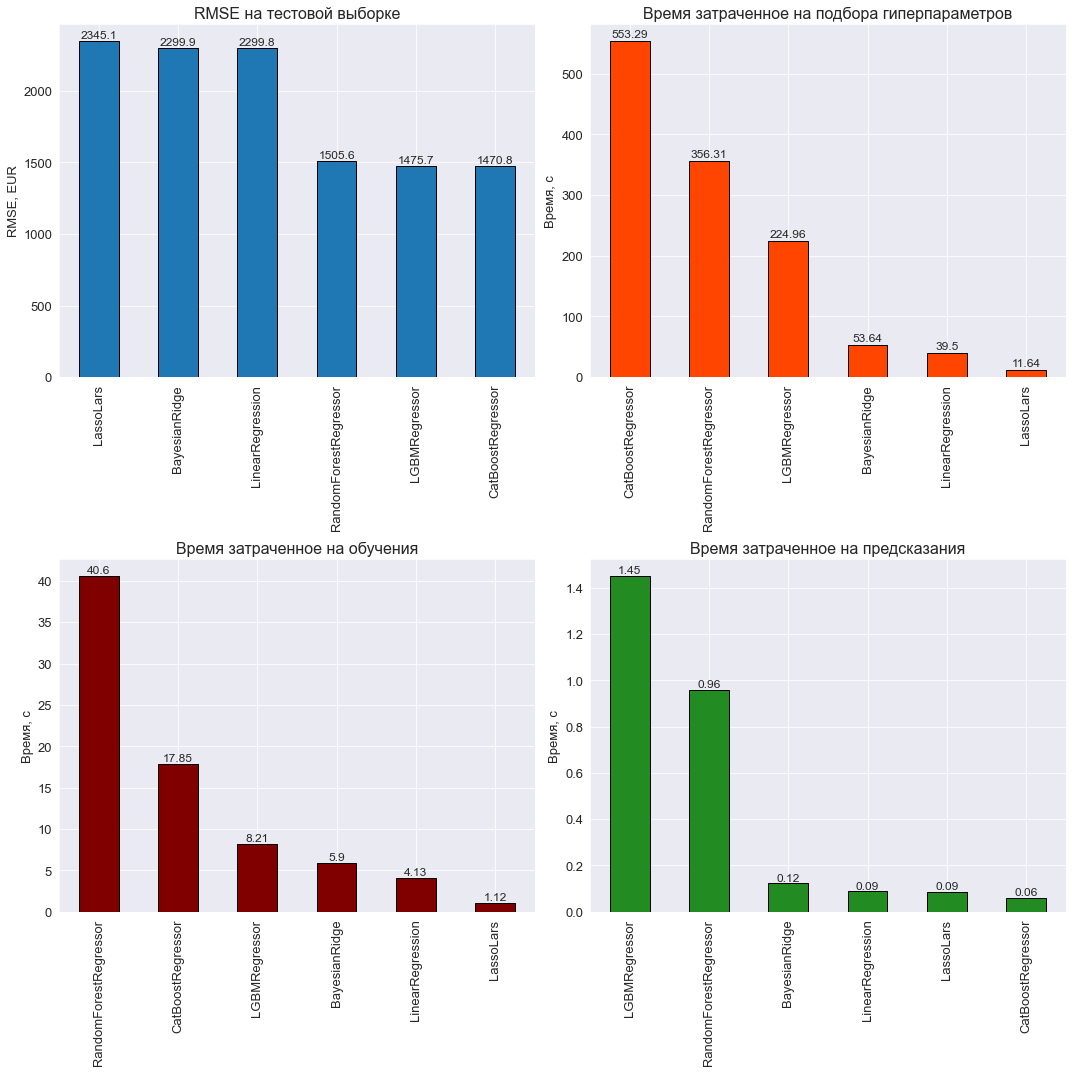

In [94]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

ax = results.sort_values('Test RMSE score, EUR', ascending=False).plot(y='Test RMSE score, EUR', x='Regressor', 
                                                                       kind='bar', ec='black', 
                                                                       ax=axes[0, 0], legend=False, fontsize=13)

for i, j in enumerate(results.sort_values('Test RMSE score, EUR', ascending=False)['Test RMSE score, EUR']):
    ax.text(i, j+20, round(j, 2), horizontalalignment='center', fontsize=12)

ax.set_title('RMSE на тестовой выборке', fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('RMSE, EUR', fontsize=13)

ax = results.sort_values('Hyperparameter tuning time, s', ascending=False).plot(y='Hyperparameter tuning time, s', 
                                                                                x='Regressor', kind='bar', 
                                                                                ec='black', color = 'orangered', 
                                                                                ax=axes[0, 1], legend=False, fontsize=13)

for i, j in enumerate(results.sort_values('Hyperparameter tuning time, s', ascending=False)['Hyperparameter tuning time, s']):
    ax.text(i, j+6, round(j, 2), horizontalalignment='center', fontsize=12)
    
ax.set_title('Время затраченное на подбора гиперпараметров', fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('Время, с', fontsize=13)

ax = results.sort_values('Learning time, s', ascending=False).plot(y='Learning time, s', x='Regressor', 
                                                                   kind='bar', ec='black', 
                                                                   color = 'maroon', ax=axes[1, 0],
                                                                   legend=False, fontsize=13)

for i, j in enumerate(results.sort_values('Learning time, s', ascending=False)['Learning time, s']):
    ax.text(i, j+0.3, round(j, 2), horizontalalignment='center', fontsize=12)
    
ax.set_title('Время затраченное на обучения', fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('Время, с', fontsize=13)

ax = results.sort_values('Prediction time, s', ascending=False).plot(y='Prediction time, s', x='Regressor', 
                                                                     kind='bar', ec='black', 
                                                                     color = 'forestgreen', ax=axes[1, 1],
                                                                     legend=False, fontsize=13)

for i, j in enumerate(results.sort_values('Prediction time, s', ascending=False)['Prediction time, s']):
    ax.text(i, j+0.01, round(j, 2), horizontalalignment='center', fontsize=12)
    
ax.set_title('Время затраченное на предсказания', fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('Время, с', fontsize=13)    
    
fig.tight_layout();

**Вывод:**
1. Лучшие результаты на тестовой выборке с использованием метрики RMSE показали модели *CatBoostRegressor* и *LGBMRegressor* с результатами *1470.8 EUR* и *1475.7 EUR*, соответственно.
2. Лучшие результаты по времени предсказания показали модели *CatBoostRegressor*, *LinearRegression* и *LassoLars* с результатами *0.06 с* и *0.09 с*, соответственно.
3. С учетом качества предсказания, скорости предсказания, времени обучения лучшей моделью, в данном случае, является *LGBMRegressor*.

## Общий вывод

Перед нами стояла задача построить модель для задачи регрессии, которая предскажет стоимость автомобиля по его техническим характеристикам, что в итоге будет использоваться cервисом по продаже автомобилей с пробегом.

С целью исключения факторов снижающих качество данных была проведена обработка противоречивых значений, восстановление и заполнение пропусков, удаление аномальных значений, стандартизация, что в итоге позволило подойти к анализу и получению ответов на целевые вопросы.

Для достижения поставленной цели было изучено и смоделировано шесть алгоритмов регрессии:

- LinearRegression; 
- BayesianRidge; 
- LassoLars; 
- RandomForestRegressor; 
- GBMRegressor; 
- CatBoostRegressor.

В качестве метрики оценки производительности использовалась метрика *RMSE*.

В результате проведенного исследования лучшие результаты *RMSE* показали модели *CatBoostRegressor* и *LGBMRegressor*, *1478.1 EUR* и *1482.7 EUR*, соответственно. С учетом качества предсказания, скорости предсказания, времени обучения лучшей моделью, в данном случае, является *LGBMRegressor*.

In [95]:
feature_importances_df = pd.DataFrame(data=models_features['LGBMRegressor'].feature_importances_,
                                      index=features_test.columns,
                                      columns=['feature_importance'])

feature_importances_df.sort_values('feature_importance', ascending=False).head(10).style.background_gradient('coolwarm')

,feature_importance
registration_year,14030
power,11530
kilometer,7776
gearbox_manual,1533
fuel_type_gasoline,1122
vehicle_type_sedan,1060
fuel_type_petrol,1017
not_repaired_yes,927
not_repaired_unknown,911
vehicle_type_wagon,664


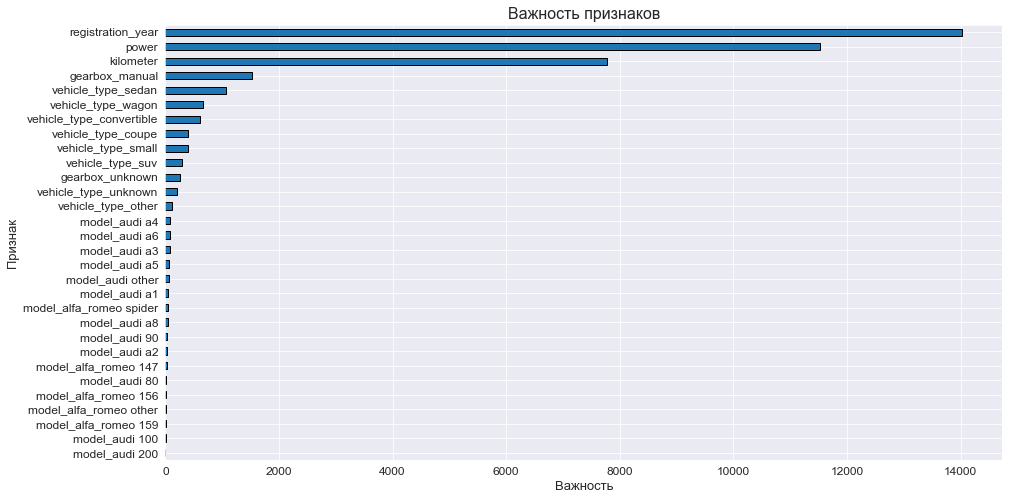

In [119]:
ax = feature_importances_df[:30].sort_values(by='feature_importance').plot(kind='barh', 
                                                                           figsize=(15, 8), 
                                                                           ec='black', 
                                                                           legend=False, 
                                                                           fontsize=12)

ax.set_title('Важность признаков', fontsize=16)
ax.set_xlabel('Важность', fontsize=13)
ax.set_ylabel('Признак', fontsize=13);